In [15]:
%pwd
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path_features_train = "../raw_data/tox21_dense_train.csv.gz" 
X = pd.read_csv(path_features_train)
X.head()

,Unnamed: 0,AW,AWeight,Arto,BertzCT,Chi0,Chi1,Chi10,Chi2,Chi3,...,W3D,W3DH,WNSA1,WNSA2,WNSA3,WPSA1,WPSA2,WPSA3,grav,rygr
0,NCGC00178831-03,5.436720e+07,13.053,2.176,3.194,23.112,15.868,1.496,15.127,12.592,...,2687.469,9241.018,115.371,-915.496,-39.983,290.078,2301.941,59.492,88.147,3.708
1,NCGC00166114-03,1.268818e+07,22.123,2.065,3.137,21.033,13.718,1.937,13.187,11.951,...,2184.384,3234.199,194.740,-1029.609,-34.205,235.360,1244.323,82.906,134.852,4.131
2,NCGC00263563-01,3.076932e+06,13.085,2.154,3.207,46.896,29.958,3.806,30.105,25.569,...,13803.524,76582.899,238.004,-4358.946,-106.537,868.685,15909.444,135.335,216.852,5.075
3,NCGC00013058-02,7.168569e+07,12.832,2.029,3.380,51.086,32.045,1.806,29.090,21.603,...,13807.345,50498.175,226.312,-2785.555,-61.923,763.288,9394.859,125.509,238.265,4.640
4,NCGC00167516-01,7.989702e+06,12.936,2.124,3.573,70.295,46.402,3.604,42.132,32.570,...,43231.286,163659.229,850.869,-21136.699,-367.122,1798.703,44681.209,362.168,317.901,7.845


In [6]:
X.shape

(12060, 802)

In [9]:
path_targets_train = "../raw_data/tox21_labels_train.csv.gz"  
y = pd.read_csv(path_targets_train)

In [11]:
y.tail()

,Unnamed: 0,NR.AhR,NR.AR,NR.AR.LBD,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53
12055,NCGC00261292-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12056,NCGC00261245-01,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
12057,NCGC00260828-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12058,NCGC00260687-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12059,NCGC00261465-01,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y.shape

(12060, 13)

In [13]:
y.isnull().sum().sort_values(ascending=False)

SR.ARE           4659
NR.Aromatase     4620
SR.MMP           4502
NR.ER            4098
SR.HSE           3643
NR.AhR           3619
NR.PPAR.gamma    3609
NR.AR.LBD        3208
SR.p53           3157
NR.ER.LBD        3020
SR.ATAD5         2697
NR.AR            2406
Unnamed: 0          0
dtype: int64

In [14]:
experiments = y.columns[1:]
experiments

Index(['NR.AhR', 'NR.AR', 'NR.AR.LBD', 'NR.Aromatase', 'NR.ER', 'NR.ER.LBD',
       'NR.PPAR.gamma', 'SR.ARE', 'SR.ATAD5', 'SR.HSE', 'SR.MMP', 'SR.p53'],
      dtype='object')

In [16]:
exp_stats = []

for i in experiments:
    n_toxic = sum(y[i] ==1)
    n_non_toxic = sum(y[i] ==0)
    n_nan = sum(y[i].isna())
    exp_stats.append([i, n_toxic, n_non_toxic, n_nan])

exp_stats
stats_df = pd.DataFrame(exp_stats, columns=['Experiment', 'Toxic (1)', 'Non-toxic (0)', 'Missing (NaN)'])
stats_df.head()

,Experiment,Toxic (1),Non-toxic (0),Missing (NaN)
0,NR.AhR,981,7460,3619
1,NR.AR,383,9271,2406
2,NR.AR.LBD,307,8545,3208
3,NR.Aromatase,378,7062,4620
4,NR.ER,964,6998,4098


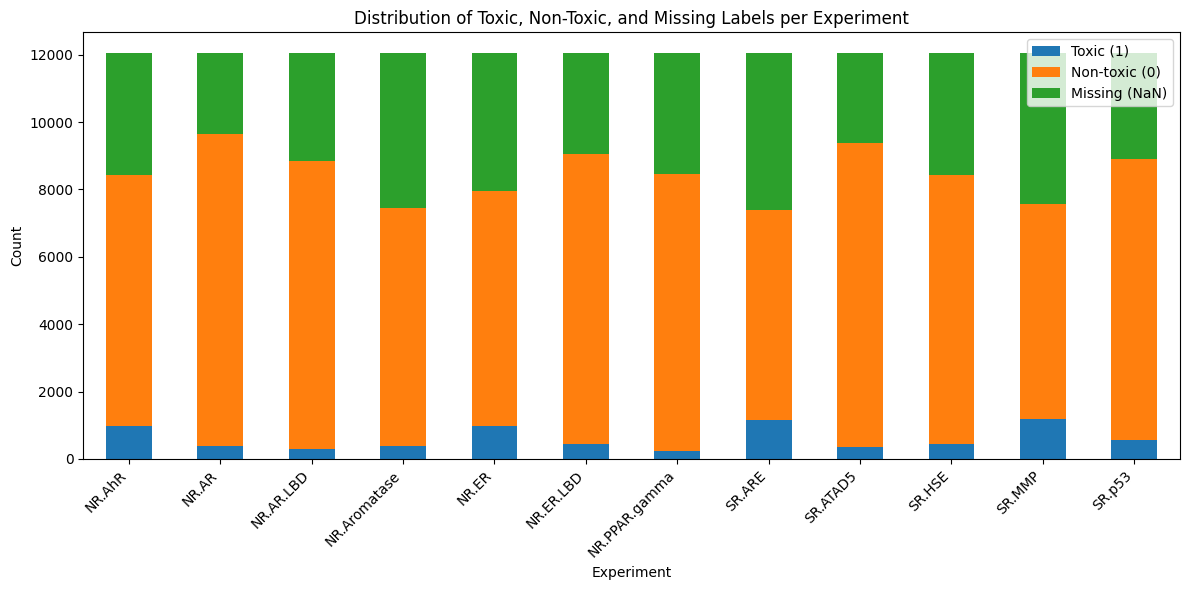

In [17]:
# Plot
stats_df.set_index('Experiment').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Distribution of Toxic, Non-Toxic, and Missing Labels per Experiment")
plt.ylabel("Count")
plt.xlabel("Experiment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()